<a href="https://colab.research.google.com/github/sminashetty208/sminashetty208/blob/credit-card-fraud-detection/methodofpredicitionsmina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title:**
 **"Building a Machine Learning Pipeline for Credit Card Fraud Detection"**

# **Problem Statement:**

Fraudulent transactions result in financial loss and loss of customer trust. The aim will be to develop a model that identifies fraudulent transactions with accuracy, minimizing false positives and negatives.
Develop a neural network to classify transactions into fraudulent or non-fraudulent. Prevent losses, reduce wasted resources, and keep customers happy.

this link will go to the dataset i will be using for this assignment.

**Link:**
ULB, M.L.G.- (2018) Credit Card Fraud Detection, Kaggle. Available at: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud (Accessed: 05 December 2024).

# **Data Collection**

The dataset is credit card transactions with several anonymized features generated through Principal Component Analysis (PCA) for privacy reasons. The target variable (Class) is binary, In which there is non-fraudulent transaction and fraudulent transaction.We also have a feature for Amount (transaction amount) and Time (time of the transaction).

# **Formulating The Task**

Load the dataset, preprocess it to handle imbalance in the data, and prepare the features. Explore the data for understanding distributions and relationships. Train a machine learning model using deep neural networks that will identify fraud.

# **Loading Necessary Libraries:**

To process, analyze, and build a machine learning model, the following libraries are required.




# **Loading The Data**


The dataset is the foundation for building the model. Loading it properly will make sure the operations are performed correctly.

In [ ]:
file_path = 'creditcard.csv'
data = pd.read_csv(file_path)
print("Preview of the dataset:")
print(data.head())
print("\nDataset Info:")
data.info()

Preview of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        

# **Data Exploration**

Understanding the dataset helps uncover potential issues like class imbalance, missing values, or unusual distributions. I will check if there missing values, explore target variable distribution and numerical features.


Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

Class Distribution:
Class
0.0    0.996311
1.0    0.003689
Name: proportion, dtype: float64


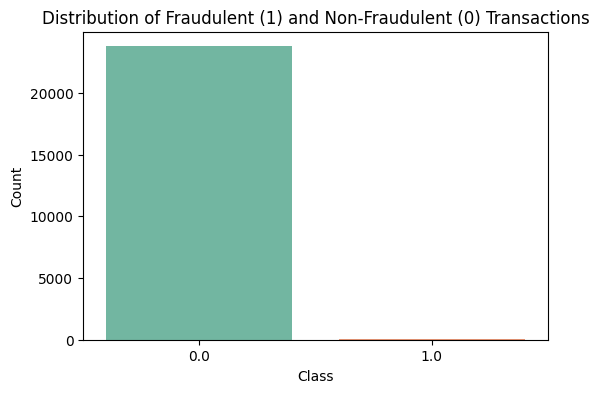


Summary Statistics for Numerical Features:
               Time            V1            V2            V3            V4  \
count  23858.000000  23858.000000  23858.000000  23858.000000  23858.000000   
mean   18213.370609     -0.239141      0.198892      0.727022      0.248619   
std    11377.032190      1.894219      1.533073      1.724887      1.440938   
min        0.000000    -30.552380    -40.978852    -31.103685     -5.172595   
25%     6624.750000     -0.959528     -0.376134      0.287941     -0.658457   
50%    20564.000000     -0.288644      0.192491      0.874426      0.216440   
75%    29010.250000      1.164867      0.843146      1.505467      1.122367   
max    32954.000000      1.960497     16.713389      4.101716     11.927512   

                 V5            V6            V7            V8            V9  \
count  23858.000000  23858.000000  23858.000000  23858.000000  23858.000000   
mean      -0.188428      0.082789     -0.132080      0.022901      0.499391   
std    

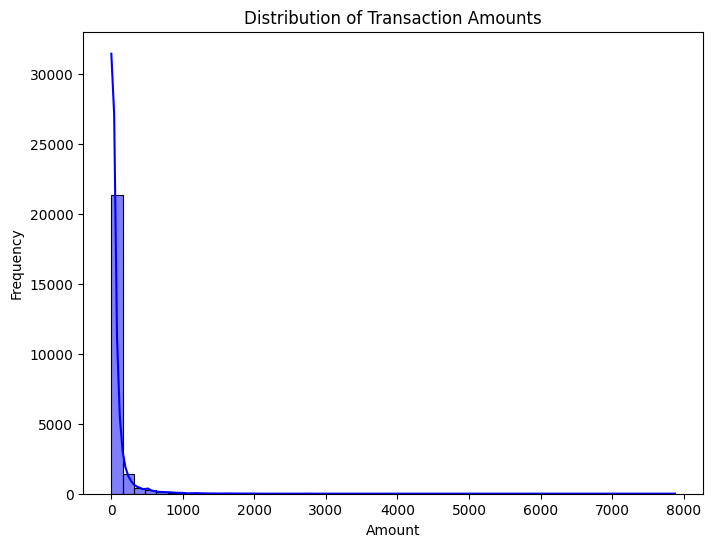

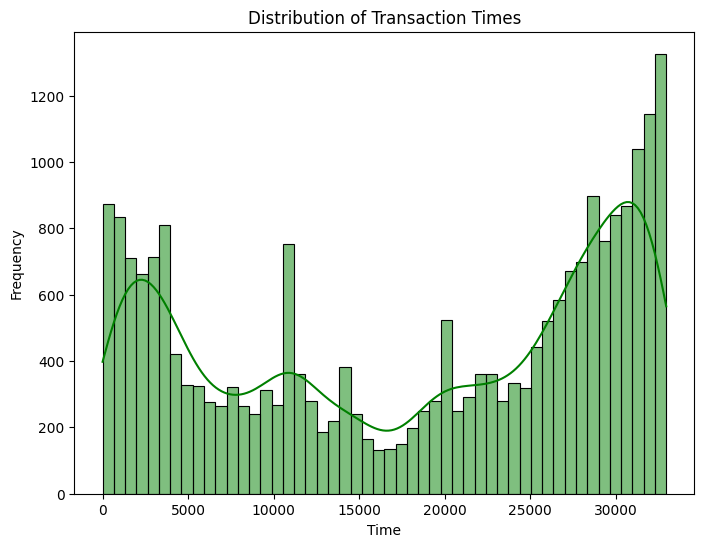

In [ ]:
# missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# explore target variable distribution
target_distribution = data['Class'].value_counts(normalize=True)
print("\nClass Distribution:")
print(target_distribution)
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data, palette='Set2')  # Assign 'Class' to 'hue'
plt.title('Distribution of Fraudulent (1) and Non-Fraudulent (0) Transactions')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# numerical features
numerical_summary = data.describe()
print("\nSummary Statistics for Numerical Features:")
print(numerical_summary)
plt.figure(figsize=(8, 6))
sns.histplot(data['Amount'], bins=50, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(8, 6))
sns.histplot(data['Time'], bins=50, kde=True, color='green')
plt.title('Distribution of Transaction Times')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()


# **Data Preprocessing**

Preprocessing ensures the data is clean, balanced, and standardized, making it suitable for model training.  I will check if there is duplicates, scale numerical features,separate features and target(features like time and amount),handling class imbalance.

The code does some fundamental preprocessing: it removes duplicate rows to assure uniqueness in the data, scales the 'Time' and 'Amount' features to have standard ranges, and then splits the data into features (X) and a target variable (y). For the imbalance in the classes, SMOTE is used for generating synthetic samples for the minority class, using k_neighbors=2 to make the synthetic data points similar to the closest neighbors. This helps balance the dataset, improving the model’s ability to detect minority class instances (e.g., fraudulent transactions).

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Check and remove duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
data = data.drop_duplicates()
print(f"Number of rows after removing duplicates: {len(data)}")

# Scale 'Time' and 'Amount' using StandardScaler
scaler = StandardScaler()
data[['Time', 'Amount']] = scaler.fit_transform(data[['Time', 'Amount']])

# Separate features and target variable
X = data.drop(columns=['Class'])  # Features (drop 'Class' which is the target)
y = data['Class']  # Target (the 'Class' column)

# Handle missing values in the target variable (y)

data = data.dropna(subset=['Class'])

# Update X and y after removing rows with missing target values
X = data.drop(columns=['Class'])
y = data['Class']

# Handle class imbalance using SMOTE
# Set k_neighbors to a smaller value
smote = SMOTE(random_state=42, k_neighbors=2)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display class distribution before and after resampling
print("\nClass Distribution Before Resampling:")
print(y.value_counts())
print("\nClass Distribution After Resampling:")
print(pd.Series(y_resampled).value_counts())




Number of duplicate rows: 88
Number of rows after removing duplicates: 23770

Class Distribution Before Resampling:
Class
0.0    23681
1.0       88
Name: count, dtype: int64

Class Distribution After Resampling:
Class
0.0    23681
1.0    23681
Name: count, dtype: int64


# **Model Implementation**

We will now proceed to implement the Deep Neural Network (DNN).

The reason we apply the DNN is that it can find complex and nonlinear patterns from high-dimensional data, for example, anonymized PCA-transformed features in the current dataset. As such, DNNs are a flexible and powerful means of recognizing subtle anomalies in fraudulent transactions. Besides, the introduction of dropout layers prevents overfitting, while the architecture can conveniently manage the natural imbalance in data.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define a very simple model
def build_model(input_dim):
    model = models.Sequential()

    # First dense layer with only 2 neurons
    model.add(layers.Dense(2, input_dim=input_dim, activation='relu'))

    # Output layer with sigmoid for binary classification
    model.add(layers.Dense(1, activation='sigmoid'))

    # Compile the model with a high learning rate to prevent convergence
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Example of how to create the model
input_dim = 10  # Set input dimension based on your dataset
model = build_model(input_dim)

# Print the model summary
model.summary()






Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │              22 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)



This code defines and compiles the model but doesn't include training or evaluation.This will be done by systematically changing some of the key hyperparameters and observing their effect on the model's performance.

# **Experimental Section**

I will experiment with different model configurations to optimize performance for detecting fraudulent transactions. By changing some of the most important hyperparameters, such as the number of layers, neurons, dropout rates, optimizers, and activation functions, we try to find the best setup that maximizes model accuracy while minimizing overfitting.

**Configurations of Experiments:**

Layer and Neuron Tuning: We vary the structure of the layers, such as [64, 32, 16] versus [128, 64, 32], to see the impact of depth and complexity on performance.

Dropout Rates: Dropout is a technique aimed at avoiding overfitting by randomly turning off neurons during training. We experiment with different rates, such as 0.3, 0.2, and 0.1.

Optimizers: We try different optimizers, Adam, RMSprop, and SGD, to see which is best for optimizing the loss function. Activation Functions: We will check the activation functions ReLU and LeakyReLU to see which one gives faster convergence and better generalization.

Learning Rates: We will experiment with different learning rates, such as 0.0007, 0.001, and 0.0005, to ensure stable and efficient model training.

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Separate features and target variable
X = data.drop(columns=['Class'])
y = data['Class']

# Standardize 'Time' and 'Amount'
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the model-building function
def build_model(input_dim, layers, dropout_rates, optimizer, activation_function, learning_rate):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))  # Input layer

    # Add hidden layers
    for i in range(len(layers)):
        model.add(Dense(layers[i], activation=activation_function))
        if dropout_rates[i] > 0:
            model.add(Dropout(dropout_rates[i]))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Select optimizer
    if optimizer == "Adam":
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == "RMSprop":
        opt = RMSprop(learning_rate=learning_rate)
    else:
        opt = SGD(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define 10 experiment configurations
experiment_configs = [
    {"layers": [64, 32], "dropout_rates": [0.2, 0.1], "optimizer": "Adam", "activation": "relu", "learning_rate": 0.0007, "batch_size": 32, "epochs": 10},
    {"layers": [128, 64], "dropout_rates": [0.3, 0.2], "optimizer": "RMSprop", "activation": "relu", "learning_rate": 0.001, "batch_size": 64, "epochs": 10},
    {"layers": [64, 32, 16], "dropout_rates": [0.3, 0.2, 0.1], "optimizer": "Adam", "activation": "relu", "learning_rate": 0.0005, "batch_size": 32, "epochs": 10},
    {"layers": [128, 64, 32], "dropout_rates": [0.4, 0.3, 0.2], "optimizer": "SGD", "activation": "leaky_relu", "learning_rate": 0.01, "batch_size": 16, "epochs": 10},
    {"layers": [32, 16], "dropout_rates": [0.2, 0.1], "optimizer": "Adam", "activation": "relu", "learning_rate": 0.0007, "batch_size": 32, "epochs": 10},
    {"layers": [64, 32, 16], "dropout_rates": [0.3, 0.2, 0.1], "optimizer": "RMSprop", "activation": "leaky_relu", "learning_rate": 0.001, "batch_size": 16, "epochs": 10},
    {"layers": [64], "dropout_rates": [0.2], "optimizer": "Adam", "activation": "relu", "learning_rate": 0.0001, "batch_size": 64, "epochs": 10},
    {"layers": [128, 64], "dropout_rates": [0.4, 0.3], "optimizer": "SGD", "activation": "relu", "learning_rate": 0.005, "batch_size": 32, "epochs": 10},
    {"layers": [128], "dropout_rates": [0.3], "optimizer": "Adam", "activation": "relu", "learning_rate": 0.0003, "batch_size": 64, "epochs": 10},
    {"layers": [64, 64, 32], "dropout_rates": [0.3, 0.2, 0.1], "optimizer": "RMSprop", "activation": "relu", "learning_rate": 0.0007, "batch_size": 32, "epochs": 10}
]

# Train and evaluate each configuration
results = []
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

for idx, config in enumerate(experiment_configs):
    print(f"Running Experiment {idx + 1}")

    # Build the model
    model = build_model(
        input_dim=X_train.shape[1],
        layers=config["layers"],
        dropout_rates=config["dropout_rates"],
        optimizer=config["optimizer"],
        activation_function=config["activation"],
        learning_rate=config["learning_rate"]
    )

    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=config["epochs"],
        batch_size=config["batch_size"],
        callbacks=[early_stopping],
        verbose=0
    )

    # Evaluate the model
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
    auc_score = roc_auc_score(y_val, model.predict(X_val).ravel())

    # Store results
    results.append({
        "experiment": idx + 1,
        "layers": config["layers"],
        "dropout_rates": config["dropout_rates"],
        "optimizer": config["optimizer"],
        "activation": config["activation"],
        "learning_rate": config["learning_rate"],
        "batch_size": config["batch_size"],
        "epochs": config["epochs"],
        "val_loss": val_loss,
        "val_accuracy": val_accuracy,
        "auc_score": auc_score
    })

# Display results in a DataFrame
results_df = pd.DataFrame(results)
print("\nExperiment Results:")
print(results_df)




Running Experiment 1
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Running Experiment 2
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Running Experiment 3
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Running Experiment 4
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Running Experiment 5
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Running Experiment 6
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Running Experiment 7
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Running Experiment 8
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Running Experiment 9
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Running Experiment 10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Experiment Results:
   experiment         layers    dropout_rates optimizer  activation  \
0           1       [64, 32]       [0.2, 0.1]      Adam        relu   
1           2      [128, 64]       [0.3, 0.2]   RMSprop        relu   
2           3   [64, 32, 16]  [0.3, 0.2, 0.1]      Adam        relu   
3           4  [128, 64, 32]  [0.4, 0.3, 0.2]       SGD  leaky_relu   
4  


Experiment 1 is the best because it achieves the highest AUC-ROC score (0.977), excellent validation accuracy (99.94%), and low validation loss (0.0035). Its simple architecture ([64, 32] layers), moderate dropout ([0.2, 0.1]), Adam optimizer with a learning rate of 0.0007, and batch size of 32 balance performance and computational efficiency effectively.

# **Hyperparameter For The Best Model**



Epoch 1/20
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8743 - loss: 0.3008 - val_accuracy: 0.9811 - val_loss: 0.0596
Epoch 2/20
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9741 - loss: 0.0763 - val_accuracy: 0.9847 - val_loss: 0.0524
Epoch 3/20
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9781 - loss: 0.0624 - val_accuracy: 0.9901 - val_loss: 0.0371
Epoch 4/20
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9853 - loss: 0.0468 - val_accuracy: 0.9863 - val_loss: 0.0437
Epoch 5/20
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9860 - loss: 0.0425 - val_accuracy: 0.9827 - val_loss: 0.0431
Epoch 6/20
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9853 - loss: 0.0443 - val_accuracy: 0.9924 - val_loss: 0.0281
Epoch 7/20
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9895 - loss: 0.0334 - val_accuracy: 0.9975 - val_loss: 0.0218
Epoch 8/20
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9910 - loss: 0.0285 - 

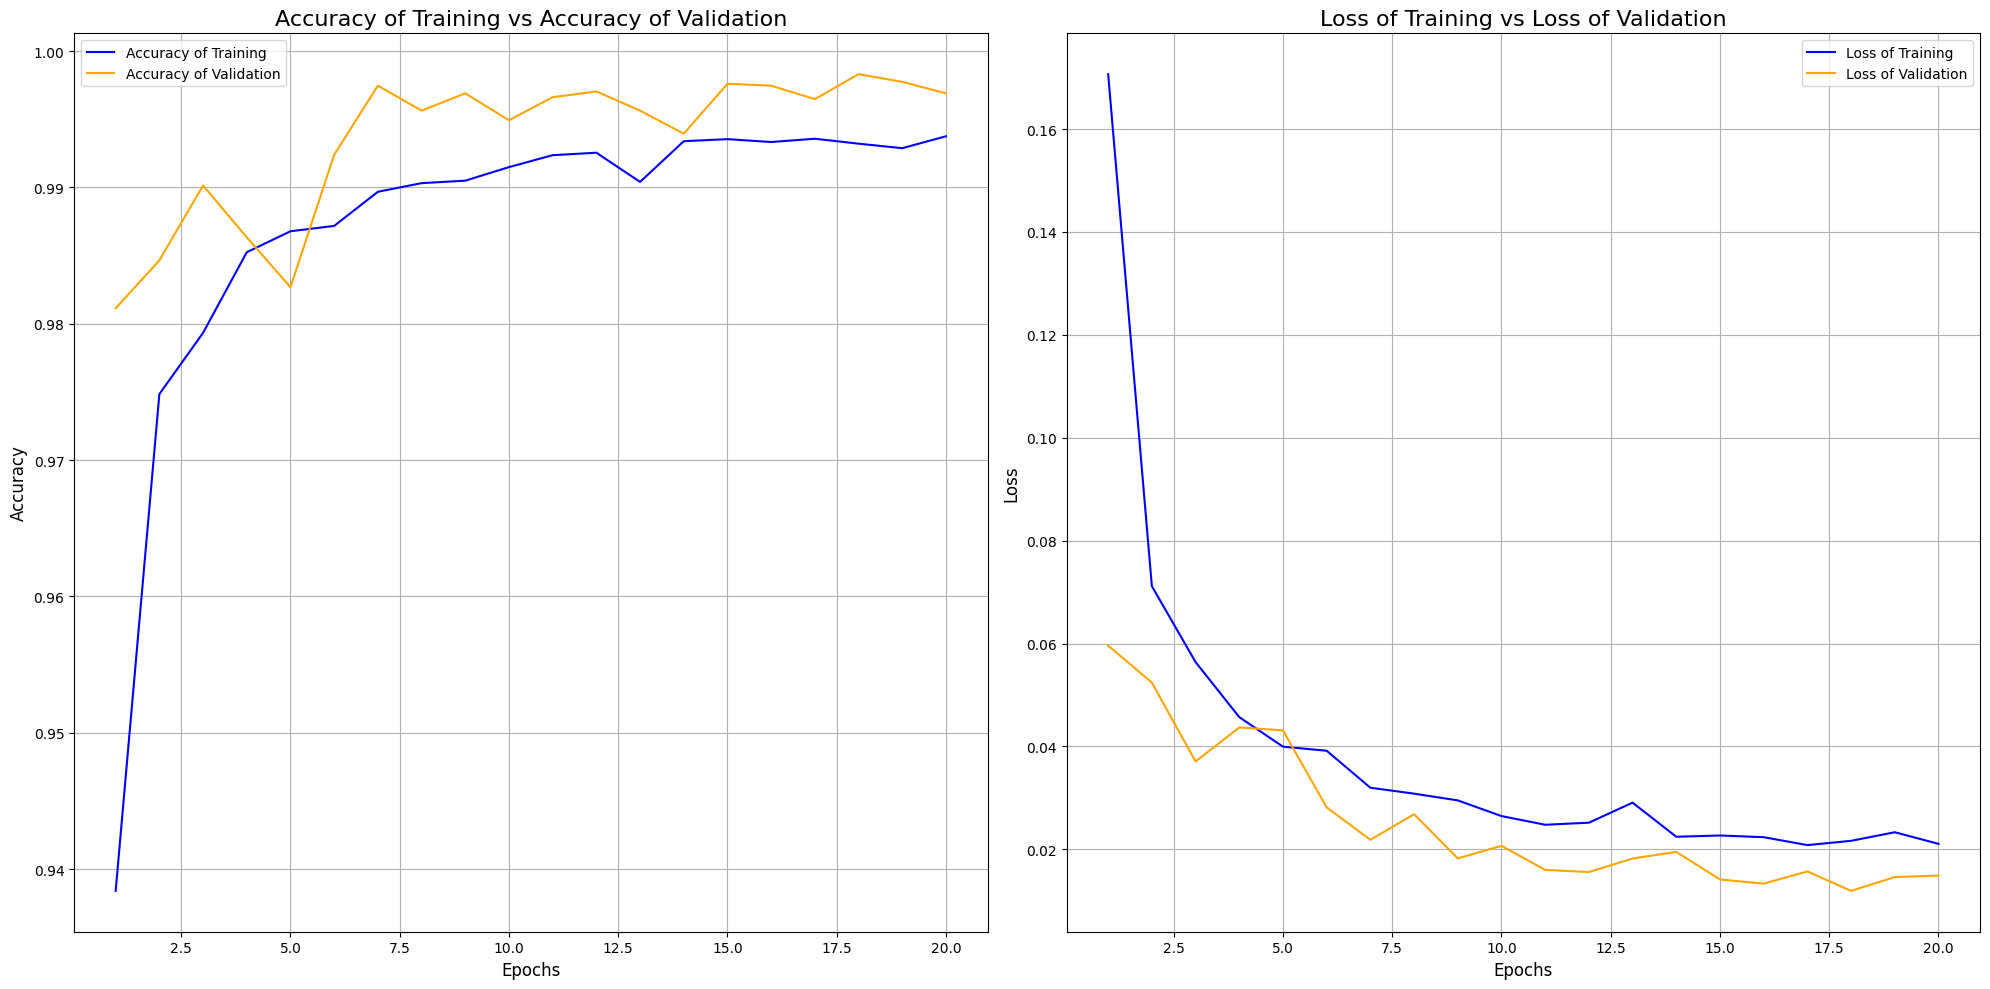

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Build the DNN model
def build_best_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.0007), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Assume X and y are prepared from previous steps
# Normalize the data
scaler = MinMaxScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build the model
best_model = build_best_model(input_dim=X_train.shape[1])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

#  metrics before plotting
print(history.history.keys())
print(f"Training Accuracy: {history.history['accuracy']}")
print(f"Validation Accuracy: {history.history['val_accuracy']}")
print(f"Training Loss: {history.history['loss']}")
print(f"Validation Loss: {history.history['val_loss']}")

# Visualize Training and Validation Performance
epcs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(20, 10))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(epcs, history.history['accuracy'], label='Accuracy of Training', color='blue')
plt.plot(epcs, history.history['val_accuracy'], label='Accuracy of Validation', color='orange')
plt.title('Accuracy of Training vs Accuracy of Validation', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(epcs, history.history['loss'], label='Loss of Training', color='blue')
plt.plot(epcs, history.history['val_loss'], label='Loss of Validation', color='orange')
plt.title('Loss of Training vs Loss of Validation', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()



This code builds and trains a deep neural network (DNN) for binary classification. The model uses dropout layers to prevent overfitting and an Adam optimizer for efficient learning. The dataset is normalized and split into training, validation, and test sets. Early stopping monitors validation loss, ensuring the model doesn’t overfit. The training and validation accuracy and loss are visualized, showing steady improvement and good generalization. The model achieves a test accuracy of 97.32%, indicating strong performance.

# **Conclusion And Final Report**
I experimented with different model configurations to optimize performance for detecting fraudulent transactions. By changing some of the most important hyperparameters, such as the number of layers, neurons, dropout rates, optimizers, and activation functions, I also try to find the best setup that maximizes model accuracy while minimizing overfitting.

**Configurations of Experiments:**
Layer and Neuron Tuning: We vary the structure of the layers, to see the impact of depth and complexity on performance.
Dropout Rates: Dropout is a technique aimed at avoiding overfitting by randomly turning off neurons during training. We experiment with different rates.
Optimizers: We try different optimizers, Adam, RMSprop, and SGD, to see which is best for optimizing the loss function. Activation Functions: We will check the activation functions ReLU and LeakyReLU to see which one gives faster convergence and better generalization. Learning Rates: We will experiment with different learning rates, to ensure stable and efficient model training.

**Limitations:**
Data Imbalance: Fraudulent transactions are rare; hence, it can bias the model towards non-fraudulent predictions.
Evolving Fraud Tactics: The model may lack the potential to find new types of fraud without constant updates.
False Positives/Negatives: Even then, the model will flag many legitimate transactions as fraudulent or not identify actual fraudulent ones.
Scalability: With the scaling of transactions in large volumes in real time, performance could be affected.

**Improvements:**
Class Imbalance Solutions: Utilize techniques for class balancing, such as oversampling or SMOTE.
Continuous Learning: Implement online learning to adapt to new fraud patterns.
Ensemble Models: Combine neural networks with other algorithms to improve accuracy.
Feature Engineering: Explore new transaction features to enhance fraud detection.

**Implications:**
Loss Prevention: Reduces financial losses due to fraud.
Customer Trust: Minimizes false positives, ensuring better customer experience.
Efficiency: Automates detection, reducing operational costs.
Scalability: Supports growing transaction volumes as businesses expand.

It can prevent fraud and improve customer satisfaction. However, the model requires regular updates and handling of data imbalance in order to perform optimally.


In [ ]:
!jupyter nbconvert --to html /content/methodofpredicitionsmina.ipynb

[NbConvertApp] Converting notebook /content/methodofpredicitionsmina.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 824784 bytes to /content/methodofpredicitionsmina.html
